In [2]:
import pandas as pd
poltava19_all = pd.read_pickle("Poltava2019_days_all.pkl")

In [4]:
pdays_19 = poltava19_all[poltava19_all["Date"] >= '2019-1-1']

In [5]:
print(pdays_19.head())

        Date code_of_entry                                           Hospital  \
0 2019-05-13       1999307  КНП "КОБЕЛЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" КО...   
1 2019-05-14       1999307  КНП "КОБЕЛЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" КО...   
2 2019-05-15       1999307  КНП "КОБЕЛЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" КО...   
3 2019-05-16       1999307  КНП "КОБЕЛЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" КО...   
4 2019-05-17       1999307  КНП "КОБЕЛЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" КО...   

    ЄДРПОУ дата введення форми 066/o в систему    id  gender birth date  \
0  1999307                          2019-06-03  2015       1 1960-11-17   
1  1999307                          2019-06-03  2015       1 1960-11-17   
2  1999307                          2019-06-03  2015       1 1960-11-17   
3  1999307                          2019-06-03  2015       1 1960-11-17   
4  1999307                          2019-06-03  2015       1 1960-11-17   

   age in days hospitalization date  ... concomitant diagnosis

### Counts and Pie chart for main diagnosis:

In [10]:
print(pdays_19.shape)
diagnosis19 = pdays_19.drop_duplicates(subset=['code_of_entry'])
print(diagnosis19.shape)

### Дивно, що кількість записів рівна всім (а не "страше" 1 січня 2019 року)

(2431169, 26)
(269618, 26)


In [17]:
diagnosis19_grouped = diagnosis19.groupby(["main diagnosis"]).count()
diagnosis19_count = diagnosis19_grouped.loc[:, 'id']

In [19]:
diagnosis19_count

main diagnosis
A02.0    256
A02.1      2
A02.8      9
A02.9      4
A03        2
        ... 
Z95.2      1
Z95.5      1
Z96.1      4
Z96.6      9
Z97.5      1
Name: id, Length: 5022, dtype: int64

In [22]:
print(diagnosis19_count[0])

256


In [23]:
diagnosis10_count = diagnosis19_count.sort_values(ascending=False)
diagnosis10_count

main diagnosis
I25.1      5391
O80.0      5356
J06.9      4259
K86.1      3861
I20.8      3860
           ... 
I24.0.7       1
I24.9.7       1
S38.0         1
S37.8         1
Z97.5         1
Name: id, Length: 5022, dtype: int64

In [24]:
sum(diagnosis10_count)

269618

In [25]:
diagnosis10_count_rel = diagnosis10_count/sum(diagnosis10_count)*100
diagnosis10_count_rel

main diagnosis
I25.1      1.999496
O80.0      1.986514
J06.9      1.579642
K86.1      1.432026
I20.8      1.431655
             ...   
I24.0.7    0.000371
I24.9.7    0.000371
S38.0      0.000371
S37.8      0.000371
Z97.5      0.000371
Name: id, Length: 5022, dtype: float64

In [26]:
print(diagnosis10_count_rel[:20])

main diagnosis
I25.1      1.999496
O80.0      1.986514
J06.9      1.579642
K86.1      1.432026
I20.8      1.431655
J20.9      1.387519
J18.9      1.352284
J06.8      1.067065
I25.1.7    1.047037
O20.0      0.935768
M42.1      0.885327
J20.8      0.863815
S06.0      0.854542
H25.1      0.851204
J18.8      0.823758
I67.4      0.821904
M51.1      0.785556
I11.9      0.765898
I70.2      0.748837
J18.1      0.733260
Name: id, dtype: float64


In [32]:
!pwd

/Users/ruska/Documents/KSE/Foregone Medical Supply 2020/notebooks


In [47]:
dcodes = pd.read_excel("../data/МКХ_10_site.xlsx", sheet_name = "codes",  usecols = "A:F", header = None)
print(dcodes)

             0        1    2       3  \
0      A00-B99      NaN  NaN     NaN   
1          NaN  A00-A09  NaN     NaN   
2          NaN      NaN  A00     NaN   
3          NaN      NaN  NaN  A00.00   
4          NaN      NaN  NaN  A00.10   
...        ...      ...  ...     ...   
12187      NaN      NaN  NaN  Z99.10   
12188      NaN      NaN  NaN  Z99.20   
12189      NaN      NaN  NaN  Z99.30   
12190      NaN      NaN  NaN  Z99.80   
12191      NaN      NaN  NaN  Z99.90   

                                                       4        5  
0       A00-B99. ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ  A00-B99  
1                    A00-A09. Кишкові інфекційні хвороби  A00-A09  
2                                            A00. Холера      A00  
3      Холера, спричинена холерним вібріоном 01, bіov...   A00.00  
4      Холера, спричинена холерним вібріоном 01, bіov...   A00.10  
...                                                  ...      ...  
12187                        Залежність від

In [ ]:
#df[['a','b']].fillna(value=0)

In [49]:
dcodes2 = dcodes[[0,1,2]].fillna(method='ffill')

In [50]:
dcodes2

,0,1,2
0,A00-B99,NaN,NaN
1,A00-B99,A00-A09,NaN
2,A00-B99,A00-A09,A00
3,A00-B99,A00-A09,A00
4,A00-B99,A00-A09,A00
...,...,...,...
12187,Z00-Z99,Z80-Z99,Z99
12188,Z00-Z99,Z80-Z99,Z99
12189,Z00-Z99,Z80-Z99,Z99
12190,Z00-Z99,Z80-Z99,Z99


In [51]:
dcodes2[3] = dcodes[3]
print(dcodes2)

             0        1    2       3
0      A00-B99      NaN  NaN     NaN
1      A00-B99  A00-A09  NaN     NaN
2      A00-B99  A00-A09  A00     NaN
3      A00-B99  A00-A09  A00  A00.00
4      A00-B99  A00-A09  A00  A00.10
...        ...      ...  ...     ...
12187  Z00-Z99  Z80-Z99  Z99  Z99.10
12188  Z00-Z99  Z80-Z99  Z99  Z99.20
12189  Z00-Z99  Z80-Z99  Z99  Z99.30
12190  Z00-Z99  Z80-Z99  Z99  Z99.80
12191  Z00-Z99  Z80-Z99  Z99  Z99.90

[12192 rows x 4 columns]


In [ ]:
"A00.00": ["Холера, спричинена", {"A00": "{А00: Холера}"}, {"A00-A09": "Кишкові інфекційні хвороби"}, {"A00-B99": "Деякі інфе"}]
A00-B99  A00-A09  A00  A00.00

{"A00.00": ['L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99']}

In [52]:
#result = [f(row[0], ..., row[n]) for row in df[['col1', ...,'coln']].to_numpy()]
import numpy as np
codes = {}
codes_all = [codes[row[1]] = row[0] for row in dcodes[[4, 5]].to_numpy()]
print(codes_all)

SyntaxError: invalid syntax (<ipython-input-52-289ee530848d>, line 4)

In [57]:
codes = [{x:y} for x, y in zip(dcodes[5], dcodes[4])]
codes

[{'A00-B99': 'A00-B99. ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ'},
 {'A00-A09': 'A00-A09. Кишкові інфекційні хвороби'},
 {'A00': 'A00. Холера'},
 {'A00.00': 'Холера, спричинена холерним вібріоном 01, bіovar chоlerae'},
 {'A00.10': 'Холера, спричинена холерним вібріоном 01, bіovar eltor'},
 {'A00.90': 'Холера, неуточнена'},
 {'A01': 'A01. Тиф та паратиф'},
 {'A01.00': 'Черевний тиф'},
 {'A01.10': 'Паратиф А'},
 {'A01.20': 'Паратиф В'},
 {'A01.30': 'Паратиф С'},
 {'A01.40': 'Паратиф, неуточнений'},
 {'A02': 'A02. Iнші сальмонельозні інфекції'},
 {'A02.00': 'Сальмонельозний ентерит'},
 {'A02.10': 'Сальмонельозна септицемія'},
 {'A02.20': 'Локалізовані сальмонельозні інфекції'},
 {'A02.80': 'Iнші уточнені сальмонельозні інфекції'},
 {'A02.90': 'Сальмонельозна інфекція, неуточнена'},
 {'A03': 'A03. Шигельоз'},
 {'A03.00': 'Шигельоз, спричинений Shіgella dysenterіae'},
 {'A03.10': 'Шигельоз, спричинений Shіgella flexnerі'},
 {'A03.20': 'Шигельоз, спричинений Shіgella boydіі'},
 {'A03.30': 'Ши

In [66]:
codes_dict = {}
for code in codes:
    for k,v in code.items():
        if v.split()[0][0:len(k)] == k:
            v = ' '.join(v.split()[1:])
        codes_dict[k] = v
print(codes_dict)

{'A00-B99': 'ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ', 'A00-A09': 'Кишкові інфекційні хвороби', 'A00': 'Холера', 'A00.00': 'Холера, спричинена холерним вібріоном 01, bіovar chоlerae', 'A00.10': 'Холера, спричинена холерним вібріоном 01, bіovar eltor', 'A00.90': 'Холера, неуточнена', 'A01': 'Тиф та паратиф', 'A01.00': 'Черевний тиф', 'A01.10': 'Паратиф А', 'A01.20': 'Паратиф В', 'A01.30': 'Паратиф С', 'A01.40': 'Паратиф, неуточнений', 'A02': 'Iнші сальмонельозні інфекції', 'A02.00': 'Сальмонельозний ентерит', 'A02.10': 'Сальмонельозна септицемія', 'A02.20': 'Локалізовані сальмонельозні інфекції', 'A02.80': 'Iнші уточнені сальмонельозні інфекції', 'A02.90': 'Сальмонельозна інфекція, неуточнена', 'A03': 'Шигельоз', 'A03.00': 'Шигельоз, спричинений Shіgella dysenterіae', 'A03.10': 'Шигельоз, спричинений Shіgella flexnerі', 'A03.20': 'Шигельоз, спричинений Shіgella boydіі', 'A03.30': 'Шигельоз, спричинений Shіgella sonneі', 'A03.80': 'Iнший шигельоз', 'A03.90': 'Шигельоз, неуточнений', 'A04

In [76]:
dcodes2 = dcodes2.fillna(0)

In [81]:
codes_nested = [{row[0]: {'L3': row[1], 'L2': row[2], 'L1': row[3]}} for row in dcodes2[[3, 2, 1, 0]].to_numpy()]
codes_nested

[{0: {'L3': 0, 'L2': 0, 'L1': 'A00-B99'}},
 {0: {'L3': 0, 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {0: {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A00.00': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A00.10': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A00.90': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {0: {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A01.00': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A01.10': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A01.20': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A01.30': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A01.40': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {0: {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A02.00': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A02.10': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A02.20': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}},
 {'A02.80': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}

In [82]:
import numpy as np
codes_nested_all = {}
for branch in codes_nested:
    for k,v in branch.items():
        if k != 0:
            codes_nested_all[k] = v
            
print(codes_nested_all)

{'A00.00': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A00.10': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A00.90': {'L3': 'A00', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A01.00': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A01.10': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A01.20': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A01.30': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A01.40': {'L3': 'A01', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A02.00': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A02.10': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A02.20': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A02.80': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A02.90': {'L3': 'A02', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A03.00': {'L3': 'A03', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A03.10': {'L3': 'A03', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A03.20': {'L3': 'A03', 'L2': 'A00-A09', 'L1': 'A00-B99'}, 'A03.30': {'L3': 'A03', 'L2': 'A00-A09', 'L1': 'A00-B99

In [83]:
import pickle

desease_codes_nested = codes_nested_all

with open('desease_codes_nested.pickle', 'wb') as handle:
    pickle.dump(desease_codes_nested, handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open('filename.pickle', 'rb') as handle:
    #b = pickle.load(handle)

#print a == b

In [80]:
desease_codes_names = codes_dict

with open('desease_codes_names.pickle', 'wb') as handle:
    pickle.dump(desease_codes_names, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [109]:
def get_upcode(code, level):
    if (len(code) < 6) and (code.find('.') != -1):
        code = code + '0'
    if len(code) == 3:
        code = code + ".00"
    try:
        upcode = desease_codes_nested[code][level]
    except KeyError:
        code = code[:3] + '.00'
        upcode = desease_codes_nested[code][level]
    return upcode
    

In [117]:
def get_code_name(code):
    if (len(code) < 6) and (code.find('.') != -1):
        code = code + '0'
    try:
        code_name = desease_codes_names[code]
    except KeyError:
        code = code[:3] + '.00'
        code_name = desease_codes_names[code]
    return code_name

In [87]:
print(get_upcode('A05.30','L1'))

A00-B99


In [90]:
print(get_code_name('A00-B99'))

ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ


In [110]:
pdays_19['main_diagnosis_L1'] = pdays_19['main diagnosis'].apply(lambda x: get_upcode(x, 'L1'))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
pdays_19['main_diagnosis_L1_name'] = pdays_19['main_diagnosis_L1'].apply(lambda x: get_code_name(x))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
pdays_19['main_diagnosis_L2'] = pdays_19['main diagnosis'].apply(lambda x: get_upcode(x, 'L2'))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
pdays_19['main_diagnosis_L2_name'] = pdays_19['main_diagnosis_L2'].apply(lambda x: get_code_name(x))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
pdays_19['main_diagnosis_L3'] = pdays_19['main diagnosis'].apply(lambda x: get_upcode(x, 'L3'))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
pdays_19['main_diagnosis_L3_name'] = pdays_19['main_diagnosis_L3'].apply(lambda x: get_code_name(x))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
pdays_19['main_diagnosis_name'] = pdays_19['main diagnosis'].apply(lambda x: get_code_name(x))

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
pdays_19.to_pickle("Poltava2019_days_all.pkl")

In [129]:
print(pdays_19.shape)
diagnosis19 = pdays_19.drop_duplicates(subset=['code_of_entry'])
print(diagnosis19.shape)

(2431169, 33)
(269618, 33)


In [130]:
diagnosis19_L2_grouped = diagnosis19.groupby(["main_diagnosis_L2"]).count()
diagnosis19_L2_count = diagnosis19_L2_grouped.loc[:, 'id']

In [131]:
diagnosis10_L2_count = diagnosis19_L2_count.sort_values(ascending=False)
diagnosis10_L2_count

main_diagnosis_L2
I20-I25    21836
J00-J06    14855
I60-I69    13520
J10-J18    11876
K80-K87     9584
           ...  
B99-B99        2
A90-A99        1
F99-F99        1
R95-R99        1
R90-R94        1
Name: id, Length: 199, dtype: int64

In [132]:
diagnosis10_L2_count_rel = diagnosis10_L2_count/sum(diagnosis10_L2_count)*100
diagnosis10_L2_count_rel

main_diagnosis_L2
I20-I25    8.098866
J00-J06    5.509647
I60-I69    5.014502
J10-J18    4.404750
K80-K87    3.554659
             ...   
B99-B99    0.000742
A90-A99    0.000371
F99-F99    0.000371
R95-R99    0.000371
R90-R94    0.000371
Name: id, Length: 199, dtype: float64

In [133]:
diagnosis10_L2_count_rel[:20]

main_diagnosis_L2
I20-I25    8.098866
J00-J06    5.509647
I60-I69    5.014502
J10-J18    4.404750
K80-K87    3.554659
N80-N98    2.926733
O80-O84    2.686764
J20-J22    2.654867
M40-M54    2.544341
M00-M25    2.523941
E10-E14    2.048825
K20-K31    1.912706
G40-G47    1.912706
J40-J47    1.880067
I10-I19    1.869311
J30-J39    1.840382
A00-A09    1.651967
S00-S09    1.633793
D10-D36    1.529571
G90-G99    1.503980
Name: id, dtype: float64

In [142]:
DiagnosisL2_20 = pd.DataFrame(diagnosis10_L2_count_rel[:20])
DiagnosisL2_20 = DiagnosisL2_20.reset_index()
DiagnosisL2_20['Diagnosis_Name'] = DiagnosisL2_20['main_diagnosis_L2'].apply(lambda x: get_code_name(x))
print(DiagnosisL2_20)
print(sum(DiagnosisL2_20['id']))

   main_diagnosis_L2        id  \
0            I20-I25  8.098866   
1            J00-J06  5.509647   
2            I60-I69  5.014502   
3            J10-J18  4.404750   
4            K80-K87  3.554659   
5            N80-N98  2.926733   
6            O80-O84  2.686764   
7            J20-J22  2.654867   
8            M40-M54  2.544341   
9            M00-M25  2.523941   
10           E10-E14  2.048825   
11           K20-K31  1.912706   
12           G40-G47  1.912706   
13           J40-J47  1.880067   
14           I10-I19  1.869311   
15           J30-J39  1.840382   
16           A00-A09  1.651967   
17           S00-S09  1.633793   
18           D10-D36  1.529571   
19           G90-G99  1.503980   

                                       Diagnosis_Name  
0                              Ішемічна хвороба серця  
1   Гострі респіраторні захворювання верхніх дихал...  
2                      Ураження судин головного мозку  
3                                   Грип та пневмонія  
4   Х

In [143]:
diagnosis19_L1_grouped = diagnosis19.groupby(["main_diagnosis_L1"]).count()
diagnosis19_L1_count = diagnosis19_L1_grouped.loc[:, 'id']

diagnosis10_L1_count = diagnosis19_L1_count.sort_values(ascending=False)
diagnosis10_L1_count

diagnosis10_L1_count_rel = diagnosis10_L1_count/sum(diagnosis10_L1_count)*100
diagnosis10_L1_count_rel

diagnosis10_L1_count_rel[:20]

DiagnosisL1_20 = pd.DataFrame(diagnosis10_L1_count_rel[:20])
DiagnosisL1_20 = DiagnosisL1_20.reset_index()
DiagnosisL1_20['Diagnosis_Name'] = DiagnosisL1_20['main_diagnosis_L1'].apply(lambda x: get_code_name(x))
print(DiagnosisL1_20)
print(sum(DiagnosisL1_20['id']))

   main_diagnosis_L1         id  \
0            I00-I99  18.757279   
1            J00-J99  16.472936   
2            K00-K99  10.429942   
3            N00-N99   8.549132   
4            O00-O99   7.539185   
5            S00-T99   7.332596   
6            G00-G99   5.960655   
7            M00-M99   5.731813   
8            C00-D48   3.567269   
9            A00-B99   3.074721   
10           H00-H59   3.069157   
11           E00-E99   2.585881   
12           L00-L99   2.456809   
13           P00-P99   1.293682   
14           F00-F99   0.659822   
15           H60-H99   0.647212   
16           Q00-Q99   0.615686   
17           R00-R99   0.557826   
18           D50-D89   0.489582   
19           Z00-Z99   0.194720   

                                       Diagnosis_Name  
0                          ХВОРОБИ СИСТЕМИ КРОВООБІГУ  
1                           ХВОРОБИ ДИХАЛЬНОЇ СИСТЕМИ  
2                           ХВОРОБИ ОРГАНІВ ТРАВЛЕННЯ  
3                        ХВОРОБИ СЕЧОСТА

In [144]:
poltava18_all = pd.read_pickle("Poltava2018_days_all.pkl")
pdays_18 = poltava18_all[poltava18_all["Date"] >= '2018-1-1']

In [147]:
def count_class(s):
    if s[:4] == "Клас":
        return 1
    else: 0

In [148]:
s = pdays_18['main diagnosis'].apply(lambda x: count_class(x))

In [150]:
s.sum()

146.0

In [151]:
print(len(s))

2519349


In [152]:
print(pdays_18.shape)

(2519349, 26)


In [153]:
pdays_18['md_class'] = pdays_18['main diagnosis'].apply(lambda x: x[:4])

/Users/ruska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
pdays_18 = pdays_18[pdays_18['md_class']!='Клас']

In [155]:
print(pdays_18.shape)

(2519203, 27)


In [156]:
pdays_18 = pdays_18.drop(columns=['md_class'])

In [231]:
pdays_18['main_diagnosis_L1'] = pdays_18['main diagnosis'].apply(lambda x: get_upcode(x, 'L1'))

pdays_18['main_diagnosis_L1_name'] = pdays_18['main_diagnosis_L1'].apply(lambda x: get_code_name(x))

pdays_18['main_diagnosis_L2'] = pdays_18['main diagnosis'].apply(lambda x: get_upcode(x, 'L2'))

pdays_18['main_diagnosis_L2_name'] = pdays_18['main_diagnosis_L2'].apply(lambda x: get_code_name(x))

pdays_18['main_diagnosis_L3'] = pdays_18['main diagnosis'].apply(lambda x: get_upcode(x, 'L3'))

pdays_18['main_diagnosis_L3_name'] = pdays_18['main_diagnosis_L3'].apply(lambda x: get_code_name(x))

pdays_18['main_diagnosis_name'] = pdays_18['main diagnosis'].apply(lambda x: get_code_name(x))

pdays_18.to_pickle("Poltava2018_days_all_diagnosis.pkl")

In [159]:
print(pdays_18.shape)
diagnosis18 = pdays_18.drop_duplicates(subset=['code_of_entry'])
print(diagnosis18.shape)
diagnosis18_L2_grouped = diagnosis18.groupby(["main_diagnosis_L2"]).count()
diagnosis18_L2_count = diagnosis18_L2_grouped.loc[:, 'id']

diagnosis18_L2_count = diagnosis18_L2_count.sort_values(ascending=False)
diagnosis18_L2_count

diagnosis18_L2_count_rel = diagnosis18_L2_count/sum(diagnosis18_L2_count)*100
diagnosis18_L2_count_rel

diagnosis18_L2_count_rel[:20]

DiagnosisL2_18_20 = pd.DataFrame(diagnosis18_L2_count_rel[:20])
DiagnosisL2_18_20 = DiagnosisL2_18_20.reset_index()
DiagnosisL2_18_20['Diagnosis_Name'] = DiagnosisL2_18_20['main_diagnosis_L2'].apply(lambda x: get_code_name(x))
print(DiagnosisL2_18_20)
print(sum(DiagnosisL2_18_20['id']))

(2519203, 33)
(260013, 33)
   main_diagnosis_L2        id  \
0            I20-I25  8.692258   
1            J00-J06  6.461985   
2            I60-I69  5.477034   
3            J10-J18  3.757120   
4            K80-K87  3.752120   
5            O80-O84  3.104460   
6            M40-M54  3.061770   
7            N80-N98  2.690250   
8            M00-M25  2.475261   
9            J20-J22  2.420648   
10           K20-K31  2.367959   
11           J40-J47  2.208736   
12           I10-I19  2.138355   
13           E10-E14  1.916443   
14           D10-D36  1.764143   
15           F10-F19  1.724145   
16           A00-A09  1.565306   
17           J30-J39  1.562230   
18           S00-S09  1.538000   
19           O20-O29  1.467234   

                                       Diagnosis_Name  
0                              Ішемічна хвороба серця  
1   Гострі респіраторні захворювання верхніх дихал...  
2                      Ураження судин головного мозку  
3                                 

In [ ]:
   main_diagnosis_L2        id  \
0            I20-I25  8.098866   
1            J00-J06  5.509647   
2            I60-I69  5.014502   
3            J10-J18  4.404750   
4            K80-K87  3.554659   
5            N80-N98  2.926733   
6            O80-O84  2.686764   
7            J20-J22  2.654867   
8            M40-M54  2.544341   
9            M00-M25  2.523941   
10           E10-E14  2.048825   
11           K20-K31  1.912706   
12           G40-G47  1.912706   
13           J40-J47  1.880067   
14           I10-I19  1.869311   
15           J30-J39  1.840382   
16           A00-A09  1.651967   
17           S00-S09  1.633793   
18           D10-D36  1.529571   
19           G90-G99  1.503980

In [160]:
df18_18 = DiagnosisL2_18_20.merge(DiagnosisL2_20, on='main_diagnosis_L2')
print(df18_18)

   main_diagnosis_L2      id_x  \
0            I20-I25  8.692258   
1            J00-J06  6.461985   
2            I60-I69  5.477034   
3            J10-J18  3.757120   
4            K80-K87  3.752120   
5            O80-O84  3.104460   
6            M40-M54  3.061770   
7            N80-N98  2.690250   
8            M00-M25  2.475261   
9            J20-J22  2.420648   
10           K20-K31  2.367959   
11           J40-J47  2.208736   
12           I10-I19  2.138355   
13           E10-E14  1.916443   
14           D10-D36  1.764143   
15           A00-A09  1.565306   
16           J30-J39  1.562230   
17           S00-S09  1.538000   

                                     Diagnosis_Name_x      id_y  \
0                              Ішемічна хвороба серця  8.098866   
1   Гострі респіраторні захворювання верхніх дихал...  5.509647   
2                      Ураження судин головного мозку  5.014502   
3                                   Грип та пневмонія  4.404750   
4   Хвороби жовчно

In [161]:
df18_19 = df18_18[['main_diagnosis_L2', 'id_x', 'id_y', 'Diagnosis_Name_x', 'Diagnosis_Name_y']]

In [162]:
df18_19 

,main_diagnosis_L2,id_x,id_y,Diagnosis_Name_x,Diagnosis_Name_y
0,I20-I25,8.692258,8.098866,Ішемічна хвороба серця,Ішемічна хвороба серця
1,J00-J06,6.461985,5.509647,Гострі респіраторні захворювання верхніх дихал...,Гострі респіраторні захворювання верхніх дихал...
2,I60-I69,5.477034,5.014502,Ураження судин головного мозку,Ураження судин головного мозку
3,J10-J18,3.757120,4.404750,Грип та пневмонія,Грип та пневмонія
4,K80-K87,3.752120,3.554659,"Хвороби жовчного міхура, жовчовивідних шляхів ...","Хвороби жовчного міхура, жовчовивідних шляхів ..."
5,O80-O84,3.104460,2.686764,Характер розродження,Характер розродження
6,M40-M54,3.061770,2.544341,Дорсопатії,Дорсопатії
7,N80-N98,2.690250,2.926733,Незапальні хвороби жіночих статевих органів,Незапальні хвороби жіночих статевих органів
8,M00-M25,2.475261,2.523941,Артропатії,Артропатії
9,J20-J22,2.420648,2.654867,Інші гострі респіраторні інфекції нижніх дихал...,Інші гострі респіраторні інфекції нижніх дихал...


In [164]:
df18_19=df18_19.drop(columns=['Diagnosis_Name_y'])


In [165]:
df18_19 = df18_19.rename(columns={'id_x':'2019', 'id_y': '2018'})

In [166]:
df18_19

,main_diagnosis_L2,2019,2018,Diagnosis_Name_x
0,I20-I25,8.692258,8.098866,Ішемічна хвороба серця
1,J00-J06,6.461985,5.509647,Гострі респіраторні захворювання верхніх дихал...
2,I60-I69,5.477034,5.014502,Ураження судин головного мозку
3,J10-J18,3.757120,4.404750,Грип та пневмонія
4,K80-K87,3.752120,3.554659,"Хвороби жовчного міхура, жовчовивідних шляхів ..."
5,O80-O84,3.104460,2.686764,Характер розродження
6,M40-M54,3.061770,2.544341,Дорсопатії
7,N80-N98,2.690250,2.926733,Незапальні хвороби жіночих статевих органів
8,M00-M25,2.475261,2.523941,Артропатії
9,J20-J22,2.420648,2.654867,Інші гострі респіраторні інфекції нижніх дихал...


In [168]:
df18_19['2019/2018'] = (df18_19['2019']/df18_19['2018']-1)*100

In [170]:
df18_19 = df18_19[['main_diagnosis_L2', '2019', '2018', '2019/2018', 'Diagnosis_Name_x']]

In [172]:
df18_19=df18_19.drop(columns=['2019/2018'])

In [173]:
df18_19

,main_diagnosis_L2,2019,2018,Diagnosis_Name_x
0,I20-I25,8.692258,8.098866,Ішемічна хвороба серця
1,J00-J06,6.461985,5.509647,Гострі респіраторні захворювання верхніх дихал...
2,I60-I69,5.477034,5.014502,Ураження судин головного мозку
3,J10-J18,3.757120,4.404750,Грип та пневмонія
4,K80-K87,3.752120,3.554659,"Хвороби жовчного міхура, жовчовивідних шляхів ..."
5,O80-O84,3.104460,2.686764,Характер розродження
6,M40-M54,3.061770,2.544341,Дорсопатії
7,N80-N98,2.690250,2.926733,Незапальні хвороби жіночих статевих органів
8,M00-M25,2.475261,2.523941,Артропатії
9,J20-J22,2.420648,2.654867,Інші гострі респіраторні інфекції нижніх дихал...


In [174]:

#In [4]: frames = [df1, df2, df3]

#In [5]: result = pd.concat(frames)

pdays_1819 = pd.concat([pdays_18, pdays_19])

In [230]:
#pdays_1819.to_pickle("Poltava1819_days_all.pkl")

In [175]:
pdays_1819_test = pdays_1819.set_index('Date')

In [180]:
pdays_1819_test = pdays_1819_test.reset_index()

In [177]:

#pdays_1819_test = pdays_1819_test.sort_index()


#In [12]: df1 = df.sort_index()  # requires sorted DatetimeIndex

#In [13]: df1.groupby([pd.TimeGrouper(freq='M'), 'user_id'])['whole_cost'].sum()

In [181]:
pdays_1819_M = pdays_1819_test.groupby([pd.Grouper(key = 'Date', freq='M'), 'main_diagnosis_L2'])['code_of_entry'].count()

In [182]:
pdays_1819_M 

Date        main_diagnosis_L2
2018-01-31  A00-A09              2236
            A15-A19               143
            A20-A28                30
            A30-A49               440
            A50-A64               114
                                 ... 
2019-12-31  Z00-Z19                15
            Z20-Z29                30
            Z40-Z54               110
            Z55-Z65                20
            Z70-Z76                 6
Name: code_of_entry, Length: 4339, dtype: int64

In [183]:
pdays_1819_M_2 = pdays_1819_M.reset_index()
pdays_1819_M_2

,Date,main_diagnosis_L2,code_of_entry
0,2018-01-31,A00-A09,2236
1,2018-01-31,A15-A19,143
2,2018-01-31,A20-A28,30
3,2018-01-31,A30-A49,440
4,2018-01-31,A50-A64,114
...,...,...,...
4334,2019-12-31,Z00-Z19,15
4335,2019-12-31,Z20-Z29,30
4336,2019-12-31,Z40-Z54,110
4337,2019-12-31,Z55-Z65,20


In [185]:
pdays_1819_heart = pdays_1819_M_2[pdays_1819_M_2['main_diagnosis_L2'] == 'I20-I25']

In [186]:
pdays_1819_heart

,Date,main_diagnosis_L2,code_of_entry
69,2018-01-31,I20-I25,19902
252,2018-02-28,I20-I25,19852
426,2018-03-31,I20-I25,20822
604,2018-04-30,I20-I25,20698
786,2018-05-31,I20-I25,19950
966,2018-06-30,I20-I25,17987
1149,2018-07-31,I20-I25,16173
1328,2018-08-31,I20-I25,15655
1509,2018-09-30,I20-I25,16574
1687,2018-10-31,I20-I25,21814


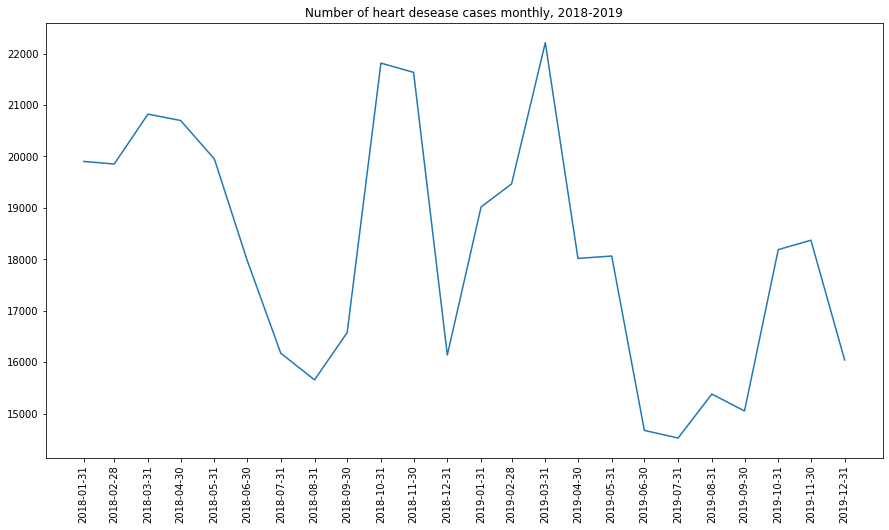

In [194]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = pdays_1819_heart['Date']
y = pdays_1819_heart['code_of_entry']

plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.title('Number of heart desease care days monthly, 2018-2019')
plt.xticks(x, rotation='vertical')
plt.show()

 Що рахує groupby count?
 1. 

In [195]:
pdays_1819_M

Date        main_diagnosis_L2
2018-01-31  A00-A09              2236
            A15-A19               143
            A20-A28                30
            A30-A49               440
            A50-A64               114
                                 ... 
2019-12-31  Z00-Z19                15
            Z20-Z29                30
            Z40-Z54               110
            Z55-Z65                20
            Z70-Z76                 6
Name: code_of_entry, Length: 4339, dtype: int64

In [196]:
pdays_1819_M_U = pdays_1819_test.groupby([pd.Grouper(key = 'Date', freq='M'), 'main_diagnosis_L2', 'code_of_entry'])['id'].count()

In [197]:
pdays_1819_M_U 

Date        main_diagnosis_L2  code_of_entry                         
2018-01-31  A00-A09            {00CEBD2B-7294-42A4-B473-9CA34CD201AE}     3
                               {018CB9EA-5834-4141-9D05-02036330EB07}     5
                               {01B2EB79-1DAA-4650-9746-C593CFA16A77}     7
                               {048686B0-5A59-4000-89F2-0AEA69CE0812}     6
                               {04C69246-D32A-478A-80B5-995454735862}     7
                                                                         ..
2019-12-31  Z55-Z65            {5D1E659C-8F19-4697-9B3C-1473B228129B}     1
                               {6B7A179F-A8A7-45EB-9EC1-846F330A1BC9}    14
                               {D2066823-29FC-4930-A88D-9188C9B998DE}     5
            Z70-Z76            {A89E22C8-ACCC-4390-B746-418999651382}     3
                               {DCF3BDA0-8BD8-4EF1-9873-82498E0762A0}     3
Name: id, Length: 661574, dtype: int64

In [198]:
pdays_1819_M_U_2 = pdays_1819_M_U.reset_index()

In [199]:
pdays_1819_M_U_2 

,Date,main_diagnosis_L2,code_of_entry,id
0,2018-01-31,A00-A09,{00CEBD2B-7294-42A4-B473-9CA34CD201AE},3
1,2018-01-31,A00-A09,{018CB9EA-5834-4141-9D05-02036330EB07},5
2,2018-01-31,A00-A09,{01B2EB79-1DAA-4650-9746-C593CFA16A77},7
3,2018-01-31,A00-A09,{048686B0-5A59-4000-89F2-0AEA69CE0812},6
4,2018-01-31,A00-A09,{04C69246-D32A-478A-80B5-995454735862},7
...,...,...,...,...
661569,2019-12-31,Z55-Z65,{5D1E659C-8F19-4697-9B3C-1473B228129B},1
661570,2019-12-31,Z55-Z65,{6B7A179F-A8A7-45EB-9EC1-846F330A1BC9},14
661571,2019-12-31,Z55-Z65,{D2066823-29FC-4930-A88D-9188C9B998DE},5
661572,2019-12-31,Z70-Z76,{A89E22C8-ACCC-4390-B746-418999651382},3


In [203]:
pdays_1819_M_U_01_18 = pdays_1819_M_U_2[pdays_1819_M_U_2['Date'] == '2018-01-31']

In [205]:
pdays_1819_M_U_01_18_A00_A09 = pdays_1819_M_U_01_18[pdays_1819_M_U_01_18['main_diagnosis_L2'] == 'A00-A09']

In [206]:
pdays_1819_M_U_01_18_A00_A09

,Date,main_diagnosis_L2,code_of_entry,id
0,2018-01-31,A00-A09,{00CEBD2B-7294-42A4-B473-9CA34CD201AE},3
1,2018-01-31,A00-A09,{018CB9EA-5834-4141-9D05-02036330EB07},5
2,2018-01-31,A00-A09,{01B2EB79-1DAA-4650-9746-C593CFA16A77},7
3,2018-01-31,A00-A09,{048686B0-5A59-4000-89F2-0AEA69CE0812},6
4,2018-01-31,A00-A09,{04C69246-D32A-478A-80B5-995454735862},7
...,...,...,...,...
367,2018-01-31,A00-A09,{FC748340-6BEE-466B-9D1D-175C2858AC7C},10
368,2018-01-31,A00-A09,{FE0A289D-0082-4C1A-A636-52D19660E50F},5
369,2018-01-31,A00-A09,{FF03599F-0621-42F7-BFFF-F612A42DAC89},8
370,2018-01-31,A00-A09,{FF7F1CEE-4DA3-4A76-91FA-0542844B477F},8


In [207]:
print(pdays_1819_M_U_01_18_A00_A09['id'].sum())

2236


In [ ]:
pdays_1819_M_U_01_18_A00_A09 = pdays_1819_M_U_01_18[pdays_1819_M_U_01_18['main_diagnosis_L2'] == 'A00-A09']

In [ ]:
1.Number of days of heart desease by month
2. Number of cases by month
3. Average number of days per case

In [211]:
pdays_1819_M_cases = pdays_1819_M_U_2[pdays_1819_M_U_2 ['main_diagnosis_L2'] == 'I20-I25']

In [212]:
pdays_1819_M_cases

,Date,main_diagnosis_L2,code_of_entry,id
6002,2018-01-31,I20-I25,{000CB0A3-6BB5-48BD-BCEA-B34DA50EA372},12
6003,2018-01-31,I20-I25,{00102C44-F04F-4C30-BFD8-8A68E19B1E50},11
6004,2018-01-31,I20-I25,{00395E65-5331-42A2-845C-4D497B386AF8},3
6005,2018-01-31,I20-I25,{003C5682-E518-497B-B308-991CC1E879B7},9
6006,2018-01-31,I20-I25,{0055DE85-4488-481C-883F-917FD122AC83},13
...,...,...,...,...
644685,2019-12-31,I20-I25,{FF81499B-07DF-48D1-A53F-58A5F4EF3C0E},11
644686,2019-12-31,I20-I25,{FFB11FD3-1153-4406-A227-78C7655B1E1F},12
644687,2019-12-31,I20-I25,{FFC519F6-4867-4AB7-A016-CC41E5CE85A8},11
644688,2019-12-31,I20-I25,{FFE034B9-A407-4B6E-B0BF-339B52BEB996},2


In [ ]:
df.groupby('group').agg({'a':['sum', 'max'], 
                         'b':'mean', 
                         'c':'sum', 
                         'd': lambda x: x.max() - x.min()})

In [214]:
pdays_1819_M_cases = pdays_1819_M_cases.groupby('Date').agg({'code_of_entry': 'count', 'id': 'sum'})
pdays_1819_M_cases

,code_of_entry,id
Date,,
2018-01-31,2532,19902
2018-02-28,2539,19852
2018-03-31,2727,20822
2018-04-30,2642,20698
2018-05-31,2509,19950
2018-06-30,2272,17987
2018-07-31,2077,16173
2018-08-31,1998,15655
2018-09-30,2089,16574


In [215]:
pdays_1819_M_cases = pdays_1819_M_cases.reset_index()

In [216]:
pdays_1819_M_cases

,Date,code_of_entry,id
0,2018-01-31,2532,19902
1,2018-02-28,2539,19852
2,2018-03-31,2727,20822
3,2018-04-30,2642,20698
4,2018-05-31,2509,19950
5,2018-06-30,2272,17987
6,2018-07-31,2077,16173
7,2018-08-31,1998,15655
8,2018-09-30,2089,16574
9,2018-10-31,2787,21814


In [217]:
pdays_1819_M_cases = pdays_1819_M_cases.rename(columns={'code_of_entry':'number of cases', 'id': 'number of days of care'})

In [219]:
pdays_1819_M_cases['Average Length of Stay by Month, days'] = pdays_1819_M_cases['number of days of care']/pdays_1819_M_cases['number of cases']

In [220]:
pdays_1819_M_cases

,Date,number of cases,number of days of care,"Average Length of Stay by Month, days"
0,2018-01-31,2532,19902,7.860190
1,2018-02-28,2539,19852,7.818826
2,2018-03-31,2727,20822,7.635497
3,2018-04-30,2642,20698,7.834217
4,2018-05-31,2509,19950,7.951375
5,2018-06-30,2272,17987,7.916813
6,2018-07-31,2077,16173,7.786712
7,2018-08-31,1998,15655,7.835335
8,2018-09-30,2089,16574,7.933940
9,2018-10-31,2787,21814,7.827054


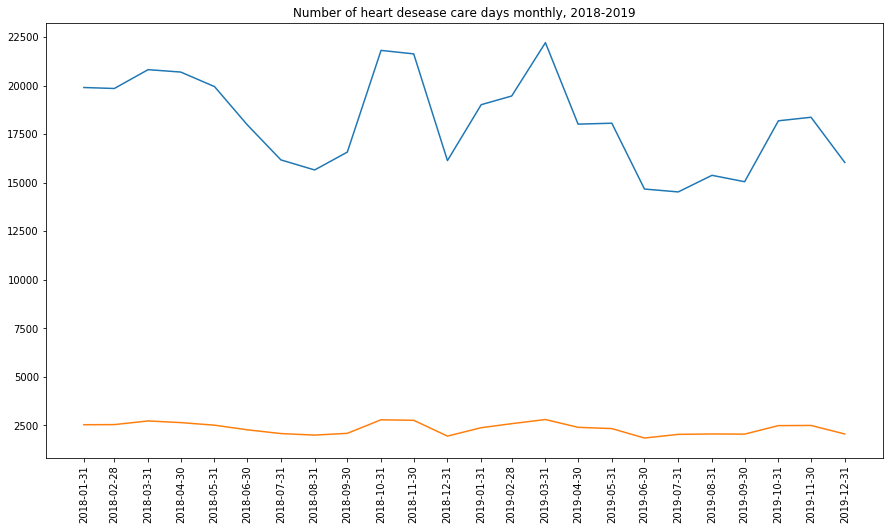

In [221]:
x = pdays_1819_M_cases['Date']
y = pdays_1819_M_cases['number of days of care']
z = pdays_1819_M_cases['number of cases']
plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.plot(x,z)
plt.title('Number of heart desease care days monthly, 2018-2019')
plt.xticks(x, rotation='vertical')
plt.show()

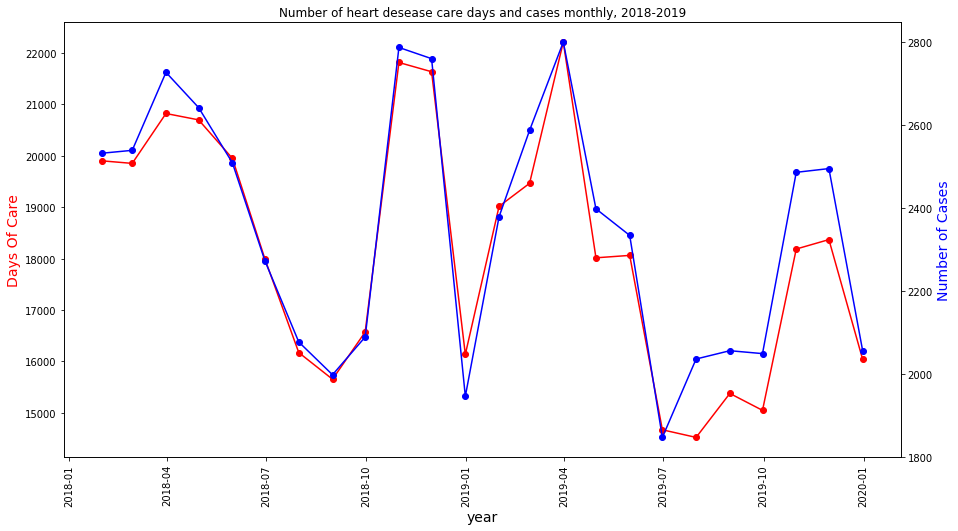

In [229]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 8))

# make a plot
ax.plot(x, y, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Days Of Care",color="red",fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, z,color="blue",marker="o")
ax2.set_ylabel("Number of Cases",color="blue",fontsize=14)
plt.title('Number of heart desease care days and cases monthly, 2018-2019')
ax.tick_params(axis='x', rotation=90)
plt.show()


In [245]:
poltava20_all = pd.read_pickle("Poltava2020_days_all_diagnosis.pkl")
pdays_20 = poltava20_all[poltava20_all["Date"] >= '2020-1-1']

In [250]:
pdays_181920 = pd.concat([pdays_18, pdays_19, pdays_20])


In [271]:
pdays_181920.to_pickle("Poltava181920_days_all.pkl")

In [238]:
list(pdays_20.columns.values)

['Date',
 'code_of_entry',
 'Hospital',
 'ЄДРПОУ',
 'дата введення форми 066/o в систему',
 'id',
 'gender',
 'birth date',
 'age in days',
 'hospitalization date',
 'discharge date',
 'main diagnosis',
 'concomitant diagnosis 1',
 'concomitant diagnosis 2',
 'concomitant diagnosis 3',
 'concomitant diagnosis 4',
 'concomitant diagnosis 5',
 'manipulation code 1',
 'manipulation code 2',
 'manipulation code 3',
 'manipulation code 4',
 'manipulation code 5',
 'result',
 'HospitalAbb',
 'hospital_id',
 'days_in_hospital']

Text(0.5, 0, 'Data')

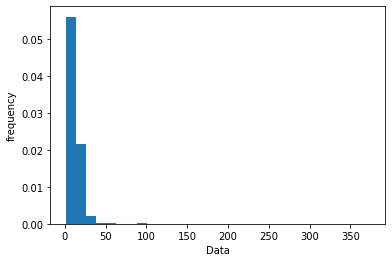

In [239]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = pdays_18[pdays_18['main_diagnosis_L2'] == 'I20-I25']['days_in_hospital']

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

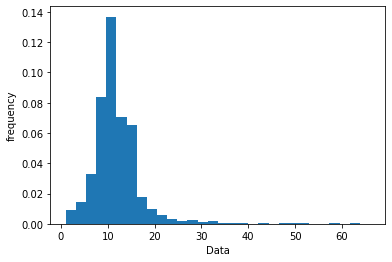

In [240]:
x = pdays_19[pdays_19['main_diagnosis_L2'] == 'I20-I25']['days_in_hospital']

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

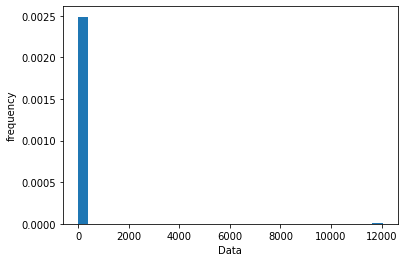

In [247]:
x = pdays_20[pdays_20['main_diagnosis_L2'] == 'I20-I25']['days_in_hospital']

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('Data')

In [248]:
pdays_181920_heart = pdays_181920[pdays_181920['main_diagnosis_L2'] == 'I20-I25']
print(pdays_181920_heart.shape)
pdays_181920_heart_NOUT = pdays_181920_heart[pdays_181920_heart['days_in_hospital'] <= 50]
print(pdays_181920_heart_NOUT.shape)

(471858, 33)
(469907, 33)


In [251]:
pdays_181920_heart_M = pdays_181920_heart.groupby([pd.Grouper(key = 'Date', freq='M'), 'main_diagnosis_L2', 'code_of_entry'])['id'].count()

In [252]:
pdays_181920_heart_M

Date        main_diagnosis_L2  code_of_entry                         
2018-01-31  I20-I25            {000CB0A3-6BB5-48BD-BCEA-B34DA50EA372}    12
                               {00102C44-F04F-4C30-BFD8-8A68E19B1E50}    11
                               {00395E65-5331-42A2-845C-4D497B386AF8}     3
                               {003C5682-E518-497B-B308-991CC1E879B7}     9
                               {0055DE85-4488-481C-883F-917FD122AC83}    13
                                                                         ..
2020-03-31  I20-I25            {FEAF2A96-B38C-491F-B6E1-E1C19BDC9412}     3
                               {FEC07A59-3BD3-4E32-A843-A52A660A15ED}     6
                               {FEDFCA61-9A29-4187-AF44-2DEA128B147F}    10
                               {FF5B2637-93C8-412D-B3C5-D265F8581D44}    15
                               {FF6E8261-5F3D-4417-83B4-69941A904A51}     9
Name: id, Length: 61258, dtype: int64

In [253]:
pdays_181920_heart_M = pdays_181920_heart_M.reset_index()

In [254]:
pdays_181920_heart_M_cases = pdays_181920_heart_M.groupby('Date').agg({'code_of_entry': 'count', 'id': 'sum'})
pdays_181920_heart_M_cases

,code_of_entry,id
Date,,
2018-01-31,2532,19902
2018-02-28,2539,19852
2018-03-31,2727,20822
2018-04-30,2642,20698
2018-05-31,2509,19950
2018-06-30,2272,17987
2018-07-31,2077,16173
2018-08-31,1998,15655
2018-09-30,2089,16574


In [255]:
pdays_181920_heart_M_cases = pdays_181920_heart_M_cases.reset_index()

In [258]:
pdays_181920_heart_M_cases  = pdays_181920_heart_M_cases.rename(columns={'code_of_entry':'number of cases', 'id': 'number of days of care'})

#pdays_181920_heart_M_cases[['number of cases', 'number of days of care']] = df[['number of cases', 'number of days of care']].apply(pd.to_numeric) 
pdays_181920_heart_M_cases['Average Length of Stay by Month, days'] = pdays_181920_heart_M_cases['number of days of care']/pdays_1819_M_cases['number of cases']

pdays_181920_heart_M_cases

,Date,number of cases,number of days of care,"Average Length of Stay by Month, days"
0,2018-01-31,2532,19902,7.860190
1,2018-02-28,2539,19852,7.818826
2,2018-03-31,2727,20822,7.635497
3,2018-04-30,2642,20698,7.834217
4,2018-05-31,2509,19950,7.951375
5,2018-06-30,2272,17987,7.916813
6,2018-07-31,2077,16173,7.786712
7,2018-08-31,1998,15655,7.835335
8,2018-09-30,2089,16574,7.933940
9,2018-10-31,2787,21814,7.827054


In [260]:
print(x)

0    2018-01-31
1    2018-02-28
2    2018-03-31
3    2018-04-30
4    2018-05-31
5    2018-06-30
6    2018-07-31
7    2018-08-31
8    2018-09-30
9    2018-10-31
10   2018-11-30
11   2018-12-31
12   2019-01-31
13   2019-02-28
14   2019-03-31
15   2019-04-30
16   2019-05-31
17   2019-06-30
18   2019-07-31
19   2019-08-31
20   2019-09-30
21   2019-10-31
22   2019-11-30
23   2019-12-31
24   2020-01-31
25   2020-02-29
26   2020-03-31
Name: Date, dtype: datetime64[ns]


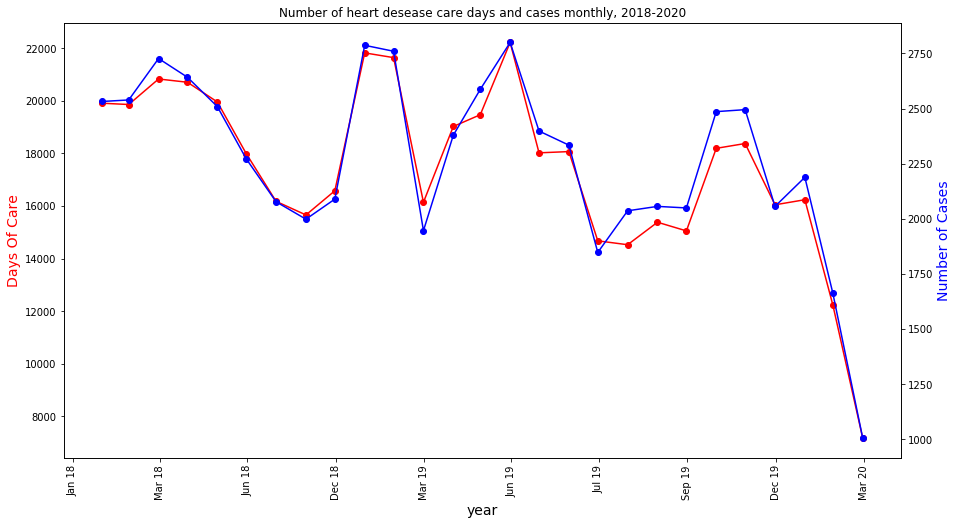

In [270]:
x = pdays_181920_heart_M_cases['Date']
y = pdays_181920_heart_M_cases['number of days of care']
z = pdays_181920_heart_M_cases['number of cases']
fig,ax = plt.subplots(figsize=(15, 8))

# make a plot
ax.plot(x, y, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Days Of Care",color="red",fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, z,color="blue",marker="o")
ax2.set_ylabel("Number of Cases",color="blue",fontsize=14)
plt.title('Number of heart desease care days and cases monthly, 2018-2020')
#labels = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', \
         #'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19', \
         #'Jan 20', 'Feb 20', 'Mar 20']
#ax.set_xticklabels(labels)
labels = ['Jan 18', 'Mar 18', 'Jun 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Jul 19', 'Sep 19', 'Dec 19', 'Mar 20']
ax.set_xticklabels(labels)
ax.tick_params(axis='x', rotation=90)

from matplotlib import pyplot as plt

plt.savefig('foo.png')
plt.show()

In [ ]:
pdays_1819_M_cases = pdays_1819_M_cases.reset_index()

pdays_1819_M_cases

pdays_1819_M_cases = pdays_1819_M_cases.rename(columns={'code_of_entry':'number of cases', 'id': 'number of days of care'})

pdays_1819_M_cases['Average Length of Stay by Month, days'] = pdays_1819_M_cases['number of days of care']/pdays_1819_M_cases['number of cases']

pdays_1819_M_cases

x = pdays_1819_M_cases['Date']
y = pdays_1819_M_cases['number of days of care']
z = pdays_1819_M_cases['number of cases']
plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.plot(x,z)
plt.title('Number of heart desease care days monthly, 2018-2019')
plt.xticks(x, rotation='vertical')
plt.show()


# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 8))

# make a plot
ax.plot(x, y, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Days Of Care",color="red",fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, z,color="blue",marker="o")
ax2.set_ylabel("Number of Cases",color="blue",fontsize=14)
plt.title('Number of heart desease care days and cases monthly, 2018-2019')
ax.tick_params(axis='x', rotation=90)
plt.show()


In [272]:
print(pdays_181920.head())

        Date                           code_of_entry  \
0 2018-07-18  {00004563-4D53-4695-B0DC-D9564E0B7F0D}   
1 2018-07-19  {00004563-4D53-4695-B0DC-D9564E0B7F0D}   
2 2018-07-20  {00004563-4D53-4695-B0DC-D9564E0B7F0D}   
3 2018-12-12  {00008388-509A-40D9-AAAE-F62C1C5B0F8D}   
4 2018-12-13  {00008388-509A-40D9-AAAE-F62C1C5B0F8D}   

                                            Hospital   ЄДРПОУ  \
0  КП "ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....  1999106   
1  КП "ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....  1999106   
2  КП "ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М....  1999106   
3  КНП "ХОРОЛЬСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ХО...  1999514   
4  КНП "ХОРОЛЬСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ХО...  1999514   

  дата введення форми 066/o в систему     id  gender           birth date  \
0                          2018-07-18  15153     2.0  1960-05-19 00:00:00   
1                          2018-07-18  15153     2.0  1960-05-19 00:00:00   
2                          2018-07-18  15

In [276]:
PHospital_ID = pdays_181920['ЄДРПОУ'].unique().tolist()

In [278]:
print(PHospital_ID)
print(len(PHospital_ID))

[1999106, 1999514, 1999678, 1999721, 1999690, 1999402, 2008968, 1999218, 1204294, 1999342, 1999613, 1984151, 1111598, 1999661, 1999632, 1999224, 5385571, 1204147, 1999537, 1999307, 1999359, 1999543, 1999388, 1111581, 1999520, 1999425, 1999201, 1999299, 1999483, 1999655, 1204348, 1999336, 1999626, 1999460, 1999448, 1999477, 1999276, 41318879, 1999394, 1999494, 26435008, 1999265, 1999253, 13961403, 1999320, 1204377, 1999112, 1999684]
48


In [279]:
import pickle

with open('Poltava_Hospital_ID.pkl', 'wb') as f:
 pickle.dump(PHospital_ID, f)